<a href="https://colab.research.google.com/github/Jaizxzx/Neural-Network_and_Deep-Learning/blob/main/Custom/Picture_Number_Predictionipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
print(tf.__version__)

2.15.0


Epoch 1/10
1875/1875 [==============================] - 58s 30ms/step - loss: 0.1451 - accuracy: 0.9543 - val_loss: 0.0484 - val_accuracy: 0.9850
Epoch 2/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0458 - accuracy: 0.9858 - val_loss: 0.0377 - val_accuracy: 0.9873
Epoch 3/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0329 - accuracy: 0.9894 - val_loss: 0.0376 - val_accuracy: 0.9881
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0244 - accuracy: 0.9924 - val_loss: 0.0307 - val_accuracy: 0.9907
Epoch 5/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0199 - accuracy: 0.9939 - val_loss: 0.0299 - val_accuracy: 0.9911
Epoch 6/10
1875/1875 [==============================] - 57s 30ms/step - loss: 0.0154 - accuracy: 0.9951 - val_loss: 0.0311 - val_accuracy: 0.9915
Epoch 7/10
1875/1875 [==============================] - 56s 30ms/step - loss: 0.0132 - accuracy: 0.9957 - val_loss: 0.0334 -

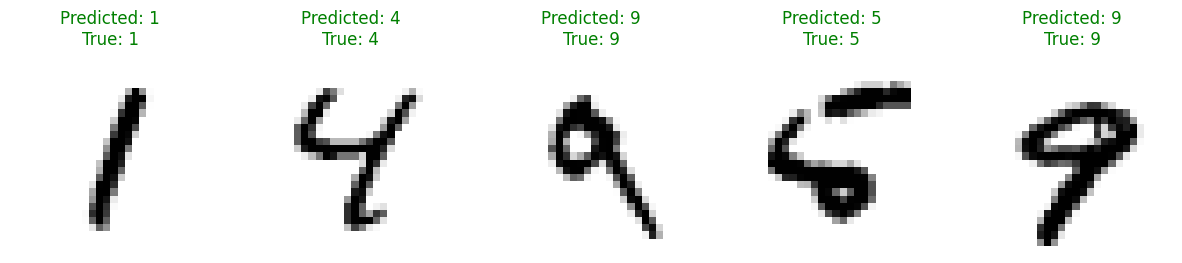

In [5]:
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# Reshape images to (28, 28, 1)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Convert labels to categorical
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

# Function to plot example predictions
def plot_example_predictions(images, labels, predictions, num_images=5):
    plt.figure(figsize=(15, 3))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
        predicted_label = np.argmax(predictions[i])
        true_label = np.argmax(labels[i])
        if predicted_label == true_label:
            color = 'green'
        else:
            color = 'red'
        plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}", color=color)
        plt.axis('off')
    plt.show()

# Make predictions on test data
predictions = model.predict(test_images[5:15])

# Plot example predictions
plot_example_predictions(test_images[5:15], test_labels[5:15], predictions)